Goal: Read in the output file from the GSD 320 mass-spec and normalize the data with respect to a gas that is expected to have a constant concentration (ie the protective gas in TGA)

Task outline:
1. Read in file and make a database of each mass
2.        Will need to ensure that this is not hard conded as number of species scanned can change
3. Ask user for mass to normlize with respect to and divide the total current for each by this value on a value-by-value basis

In [3]:
# Needed imports and installations
!pip install inflect
from datetime import datetime
from pathlib import Path
# Imports for plotting
import matplotlib.pyplot as plt
import pandas as pd
import re
#import inflect

# User input - file selection
# Specify file path
# If it is relative delete the 'r'
# If it is an absolute path include the 'r'
# If copy/pasting a file path from windows all '\' will have to be changed to '/'
# The TGA data MUST be a .txt file to read in the start time correctly!
file_path_MS_Data = r"C:/Users/megan/OneDrive - Northwestern University/Documents/01 HEIS/Data/TGA/2025_02_07_Sample_2025_01_31_N_MEB_1/oxyhydrideTGA-reoxidize-midlength-1, Position 1, RGA QMG220 100M 64D2410018AB, 002-08-2025 16'19'22.dat"
file_path_out = "C:/Users/megan/OneDrive - Northwestern University/Documents/01 HEIS/Data/TGA/2025_02_07_Sample_2025_01_31_N_MEB_1/normalizedMS_data-1.csv"
# These are only needed if you mess up the file path and send it to a non-existant directory
#file_path_out = Path(file_path_out)
#file_path_out.parent.mkdir(parents=True, exist_ok=True)


Data file format:
1. Software version - StringVar
2. Text - don't save
3. Run path/name - StringVar
4. Date and time - split into DateTime object
5. Mass spec sensor ID - StringVar
6. Number of bins (there are 3 additional cols for the digital signals) - Use to set size of tables
7. Number of time points - IntVar
8. blank
9. Long names/mass number - (Key in table)
10. Data (to end of file) - Table of numbers

In [4]:
# Read in the first 9 lines of file to know what the names and such will be
with open(file_path_MS_Data) as input_file:
    head = [next(input_file) for line in range(9)]
#print(head)

softwareversion = head[0].rstrip()
runpath = head[2].rstrip()
datatimetext = head[3].rstrip().replace(" ", "")
datatime = datetime.strptime(datatimetext, "%m/%d/%Y%H:%M:%S")
massSpecID = head[4].rstrip()
numBins = 3 + int(re.findall('\d+',head[5].rstrip())[0]) # Plus the three dig. signals
numPoints = int(re.findall('\d+',head[6].rstrip())[0])

# Also generate the list of key names

# do NOT use dictionary as order may not be preserved. What does pandas have for datastructures? DataFrame!

# PD can directly read in a file
pdtable = pd.read_table(file_path_MS_Data, header=7)
#display(pdtable)
# Much easier and faster lol.
# Use old code to rename amu col names
amuValues = re.findall('\d+',head[8].rstrip())[:-4]# last 4 are the digital channels - remove
#print(amuValues)
for i in range(0, len(amuValues)):
    amuValues[i] = int(amuValues[i])

column_list = pdtable.columns.tolist()
for j in range(6, len(amuValues)+6):
    pdtable.rename(columns={column_list[j]: amuValues[j-6]}, inplace=True)

display(pdtable)
#print(amuValues)
#amuValuesStrings = re.findall('\d+',head[8].rstrip())[:-4]# last 4 are the digital channels - remove
#print(len(amuValuesStrings[1]))
#amuValues = [int(string) for string in amuValuesStrings]
#print(amuValues)
#amuWords = {}
# For now using the text form of amu values as the key in the dictonary. If this gets annoying, can change to the number
#for each in amuValues:
 #   p = inflect.engine()
  #  name = p.number_to_words(each).rstrip().replace("-", "")
   # amuWords[name] = []
#print("AMU WORDS: ")
#print(amuWords)

# Also add the other things in that header (so head[8], items 0 - 5 and the last 4)
# For head[8], this will be the name of all our variables - needs extra attention
#varNames = head[8].split("\t")
#print("Var Names: ")
#print(varNames)
#otherdata = {}
#for each in varNames:
 #   otherdata[each] = []
#print("OTHER DATA: ")
#print(otherdata)


,Time Relative (sec),Time Absolute (UTC),Time Absolute (Date_Time),Step,Ionizer_State,Pressure,1,2,12,16,...,18,28,32,36,40,44,Periph:_Digital_In_0,Periph:_Digital_In_1,Periph:_Digital_In_2,Periph:_Digital_In_3
0,16.588,1.739053e+09,02/08/2025_16:19:39.552,1,3,0.000007,2.925894e-10,2.518474e-12,2.588841e-14,2.393779e-09,...,5.691062e-11,1.807123e-07,4.424699e-08,4.037801e-10,8.173329e-08,5.692532e-12,1,1,1,1
1,18.859,1.739053e+09,02/08/2025_16:19:41.823,1,3,0.000007,2.900238e-10,2.609272e-12,6.025870e-14,2.403376e-09,...,5.721590e-11,1.808606e-07,4.412148e-08,4.025015e-10,8.154007e-08,5.733898e-12,1,1,1,1
2,21.138,1.739053e+09,02/08/2025_16:19:44.102,1,3,0.000007,2.888425e-10,2.625649e-12,3.083223e-14,2.392339e-09,...,5.677808e-11,1.802503e-07,4.393956e-08,4.009574e-10,8.136733e-08,5.669357e-12,1,1,1,1
3,23.423,1.739053e+09,02/08/2025_16:19:46.387,1,3,0.000007,2.870788e-10,2.593662e-12,8.841980e-14,2.380717e-09,...,5.636536e-11,1.797182e-07,4.379659e-08,3.990655e-10,8.109204e-08,5.464469e-12,1,1,1,1
4,25.711,1.739053e+09,02/08/2025_16:19:48.675,1,3,0.000007,2.849690e-10,2.609741e-12,5.251188e-14,2.374738e-09,...,5.608897e-11,1.790450e-07,4.366774e-08,3.984943e-10,8.084881e-08,5.435298e-12,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32381,74002.602,1.739127e+09,02/09/2025_12:52:45.566,1,3,0.000009,3.907782e-10,2.748322e-12,5.690327e-13,5.798538e-11,...,2.490676e-11,2.635515e-09,5.133174e-10,5.170193e-10,1.150619e-07,1.304506e-12,1,1,1,1
32382,74004.879,1.739127e+09,02/09/2025_12:52:47.843,1,3,0.000009,3.908777e-10,2.734036e-12,5.652629e-13,5.807898e-11,...,2.479986e-11,2.639196e-09,5.128090e-10,5.170872e-10,1.149438e-07,1.248074e-12,1,1,1,1
32383,74007.163,1.739127e+09,02/09/2025_12:52:50.127,1,3,0.000009,3.915199e-10,2.760392e-12,5.747666e-13,5.798799e-11,...,2.471559e-11,2.636351e-09,5.142162e-10,5.168560e-10,1.150095e-07,1.316613e-12,1,1,1,1
32384,74009.446,1.739127e+09,02/09/2025_12:52:52.410,1,3,0.000009,3.910769e-10,2.725401e-12,5.785589e-13,5.813301e-11,...,2.471173e-11,2.638647e-09,5.144926e-10,5.180146e-10,1.150397e-07,1.296608e-12,1,1,1,1


Now plot as-is to make sure this is read in correctly

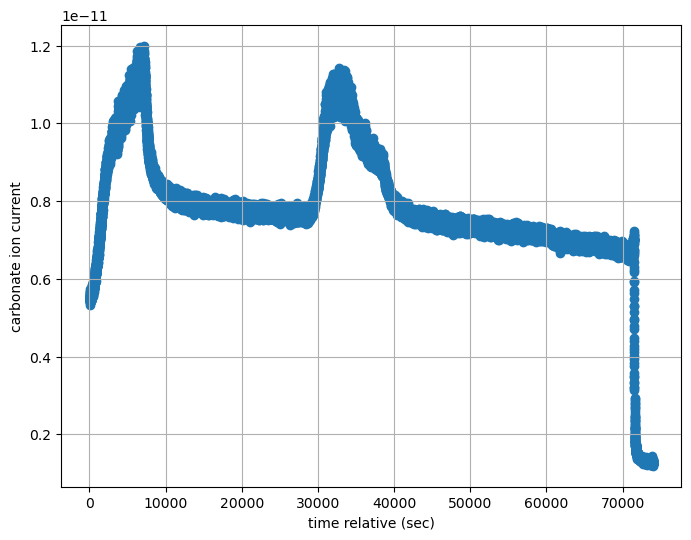

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(pdtable['Time Relative (sec)'], pdtable[44])
plt.xlabel("time relative (sec)")
plt.ylabel("carbonate ion current")
plt.xscale('linear')
plt.grid(True)
plt.show()

Time Relative (sec)


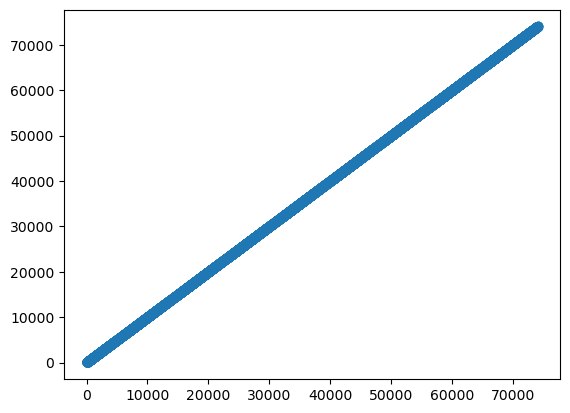

Time Absolute (UTC)


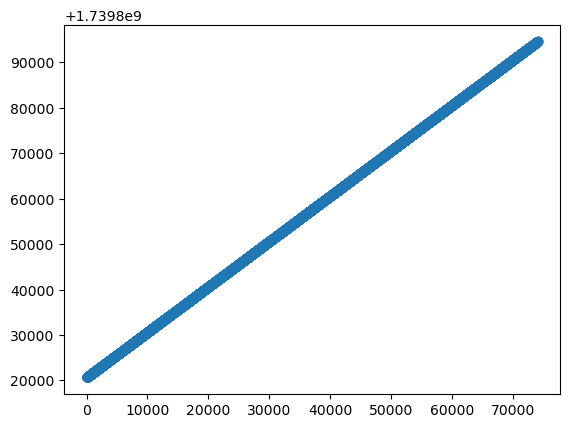

Time Absolute (Date_Time)


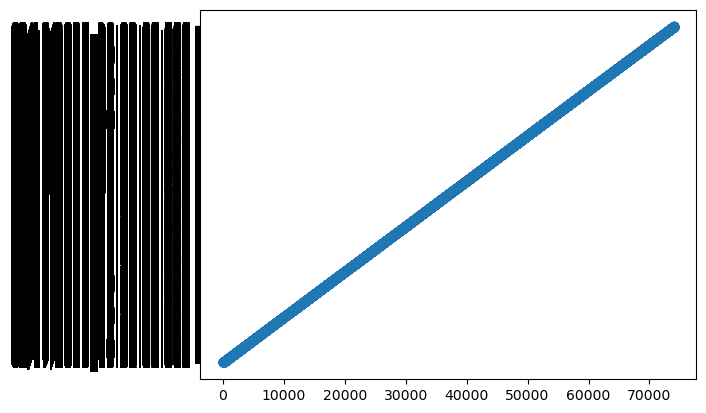

Step


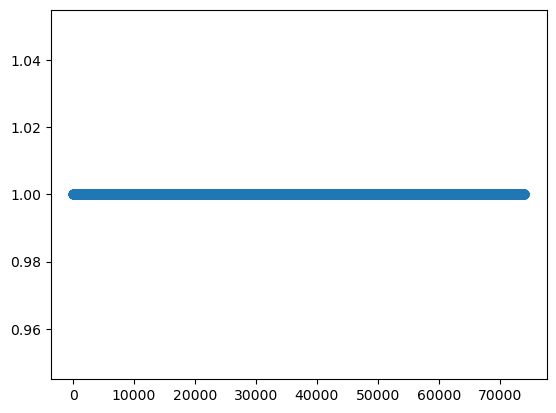

Ionizer_State


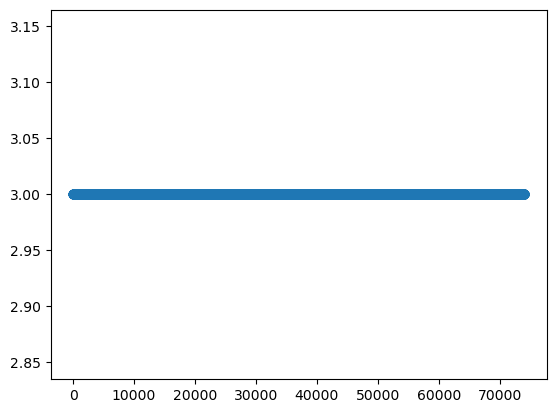

Pressure


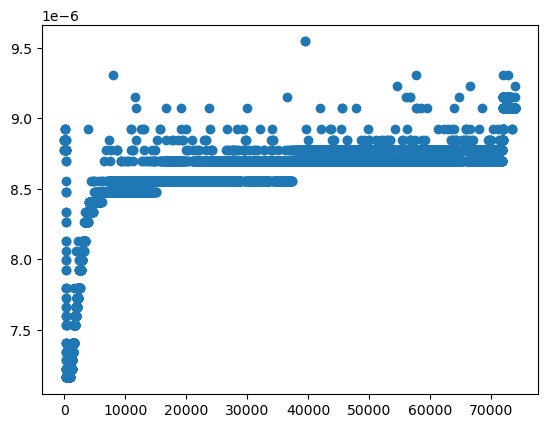

1


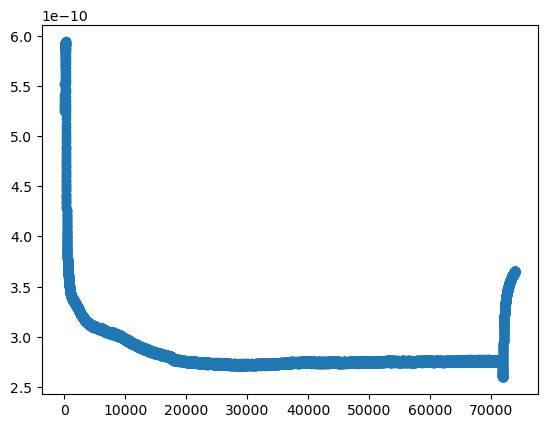

2


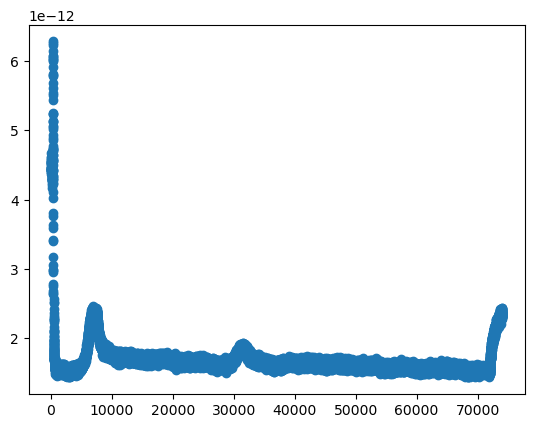

12


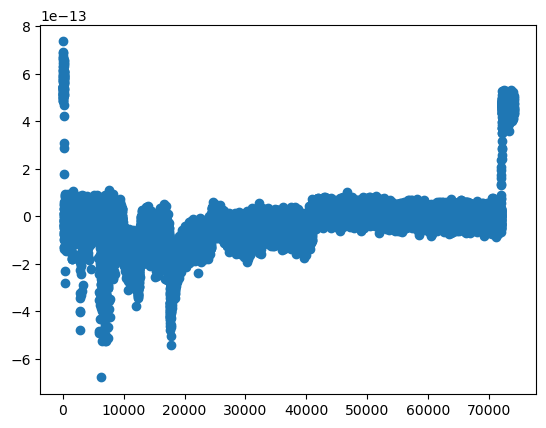

16


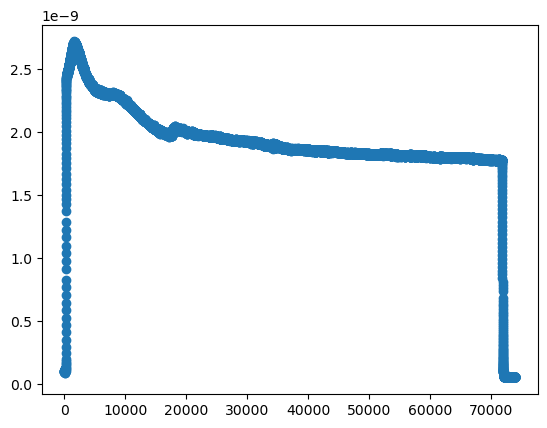

17


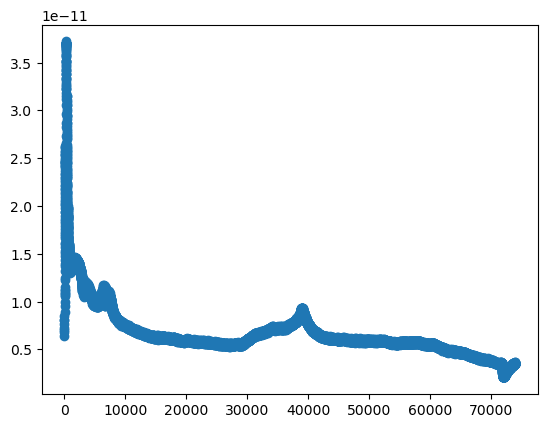

18


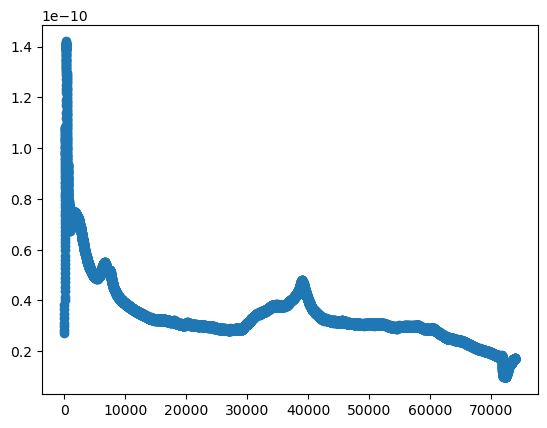

28


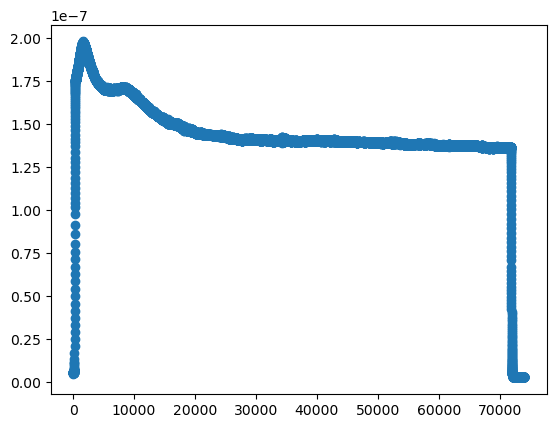

32


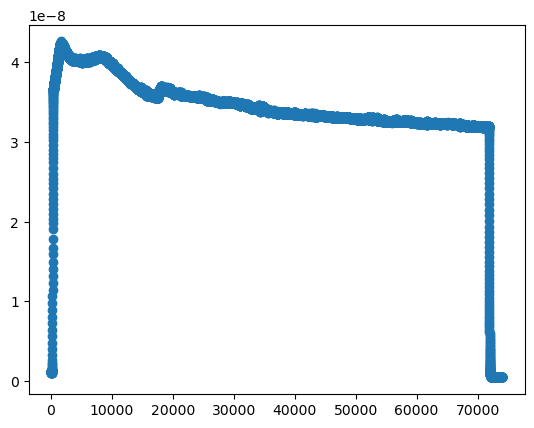

36


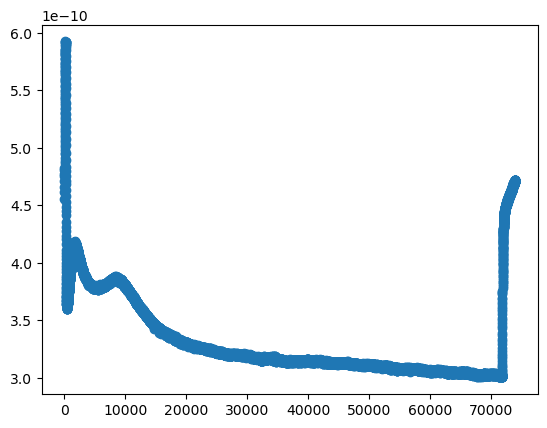

40


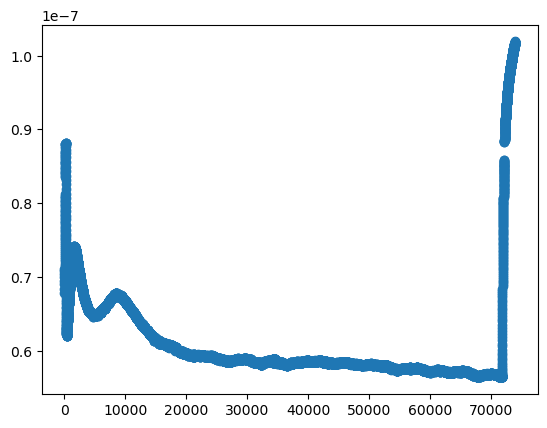

44


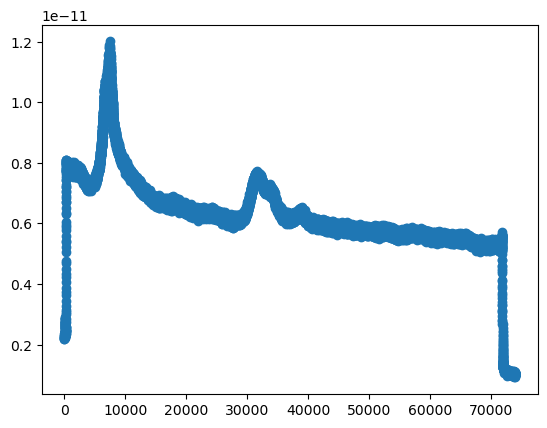

Periph:_Digital_In_0


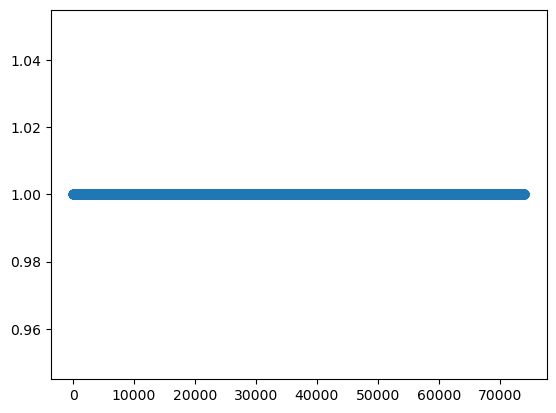

Periph:_Digital_In_1


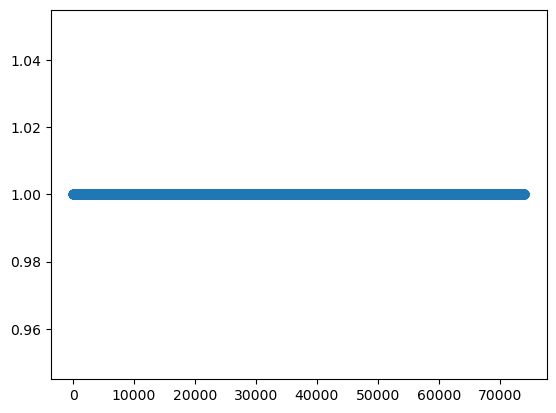

Periph:_Digital_In_2


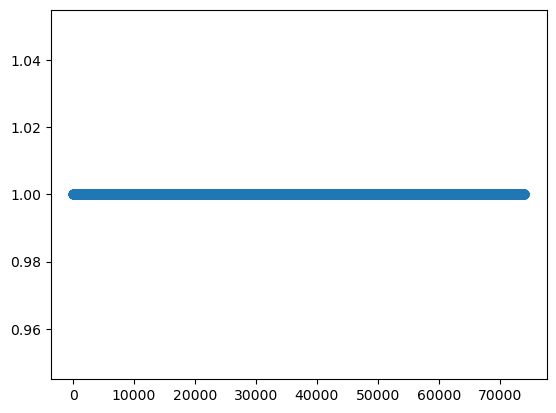

Periph:_Digital_In_3


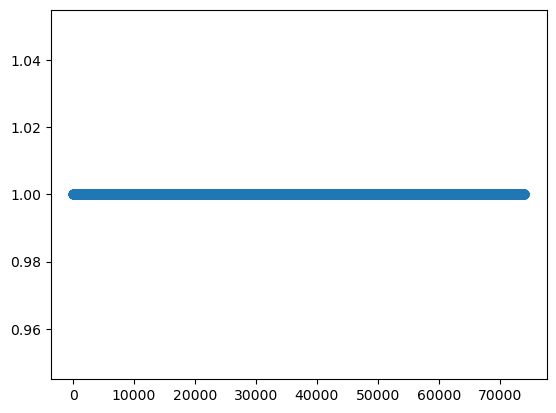

In [ ]:

for col in pdtable:
    print(col)
    if(col!="Time Absolute (Date_Time)"):
        plt.scatter(pdtable['Time Relative (sec)'],pdtable[col])
    # Show/save figure as desired.
    plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()


Looks reasonable. Now normalize to user inputted amu value

In [6]:
amuConst = 40 # Change to some background gas with constant flow rate

cols_divide = pdtable.columns.tolist()[6:-4]
print(cols_divide)
for each in cols_divide:
    if each != amuConst:
        print(each)
        pdtable[each] = pdtable[each]/pdtable[amuConst]
pdtable[amuConst] = pdtable[amuConst]/pdtable[amuConst]

display(pdtable)
# Now normalize cols [6:-4] by this col

[1, 2, 12, 16, 17, 18, 28, 32, 36, 40, 44]
1
2
12
16
17
18
28
32
36
44


,Time Relative (sec),Time Absolute (UTC),Time Absolute (Date_Time),Step,Ionizer_State,Pressure,1,2,12,16,...,18,28,32,36,40,44,Periph:_Digital_In_0,Periph:_Digital_In_1,Periph:_Digital_In_2,Periph:_Digital_In_3
0,16.588,1.739053e+09,02/08/2025_16:19:39.552,1,3,0.000007,0.003580,0.000031,3.167425e-07,0.029288,...,0.000696,2.211001,0.541358,0.004940,1.0,0.000070,1,1,1,1
1,18.859,1.739053e+09,02/08/2025_16:19:41.823,1,3,0.000007,0.003557,0.000032,7.390072e-07,0.029475,...,0.000702,2.218058,0.541102,0.004936,1.0,0.000070,1,1,1,1
2,21.138,1.739053e+09,02/08/2025_16:19:44.102,1,3,0.000007,0.003550,0.000032,3.789263e-07,0.029402,...,0.000698,2.215267,0.540015,0.004928,1.0,0.000070,1,1,1,1
3,23.423,1.739053e+09,02/08/2025_16:19:46.387,1,3,0.000007,0.003540,0.000032,1.090363e-06,0.029358,...,0.000695,2.216225,0.540085,0.004921,1.0,0.000067,1,1,1,1
4,25.711,1.739053e+09,02/08/2025_16:19:48.675,1,3,0.000007,0.003525,0.000032,6.495071e-07,0.029373,...,0.000694,2.214566,0.540116,0.004929,1.0,0.000067,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32381,74002.602,1.739127e+09,02/09/2025_12:52:45.566,1,3,0.000009,0.003396,0.000024,4.945447e-06,0.000504,...,0.000216,0.022905,0.004461,0.004493,1.0,0.000011,1,1,1,1
32382,74004.879,1.739127e+09,02/09/2025_12:52:47.843,1,3,0.000009,0.003401,0.000024,4.917732e-06,0.000505,...,0.000216,0.022961,0.004461,0.004499,1.0,0.000011,1,1,1,1
32383,74007.163,1.739127e+09,02/09/2025_12:52:50.127,1,3,0.000009,0.003404,0.000024,4.997559e-06,0.000504,...,0.000215,0.022923,0.004471,0.004494,1.0,0.000011,1,1,1,1
32384,74009.446,1.739127e+09,02/09/2025_12:52:52.410,1,3,0.000009,0.003399,0.000024,5.029211e-06,0.000505,...,0.000215,0.022937,0.004472,0.004503,1.0,0.000011,1,1,1,1


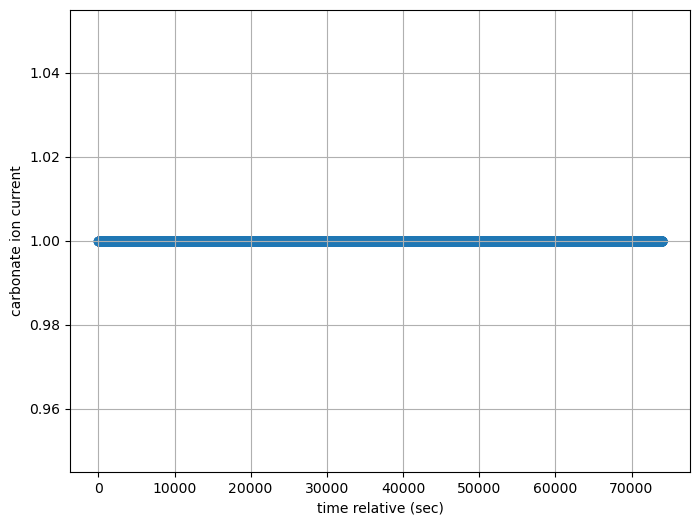

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(pdtable['Time Relative (sec)'], pdtable[40])
plt.xlabel("time relative (sec)")
plt.ylabel("carbonate ion current")
plt.xscale('linear')
plt.grid(True)
plt.show()

In [ ]:
pdtable.to_csv(file_path_out, index=False)

Time Relative (sec)


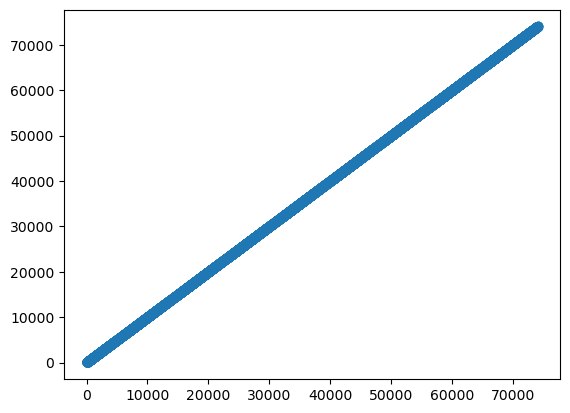

Time Absolute (UTC)


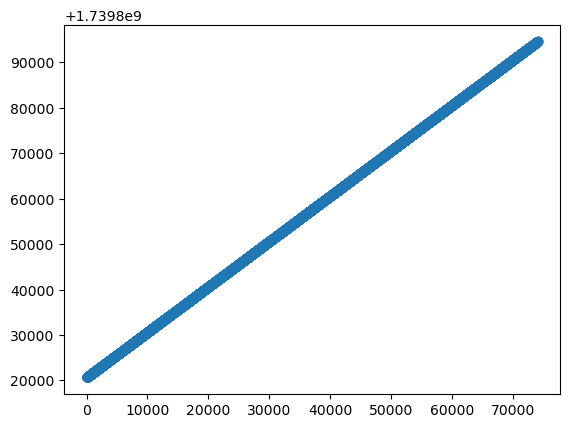

Time Absolute (Date_Time)
Step


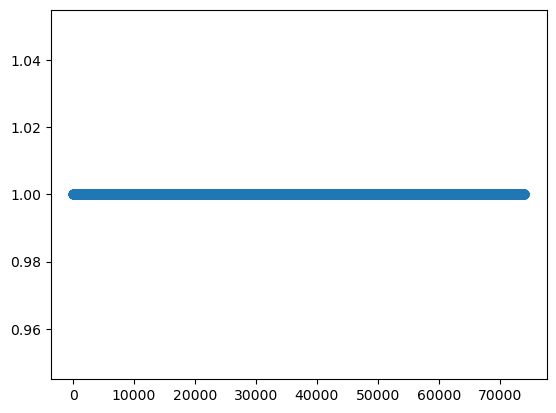

Ionizer_State


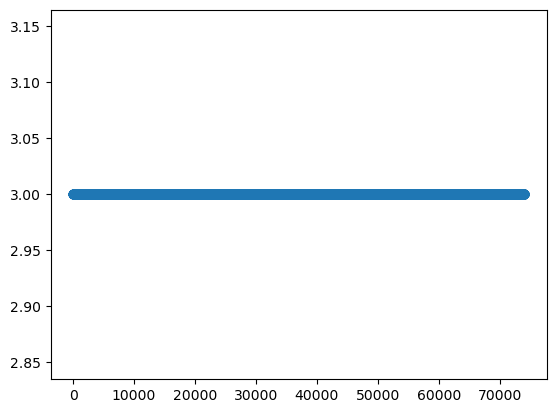

Pressure


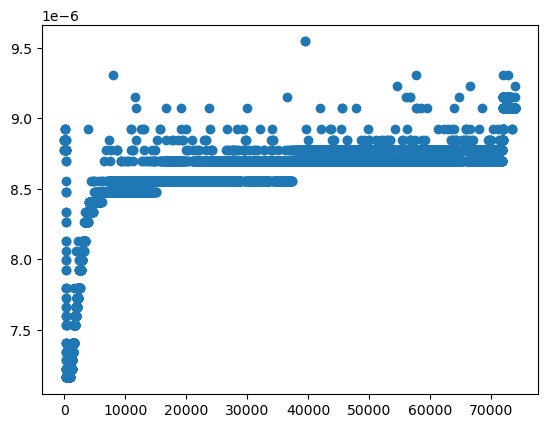

1


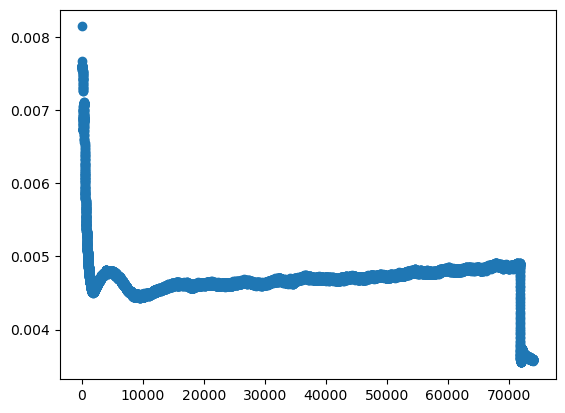

2


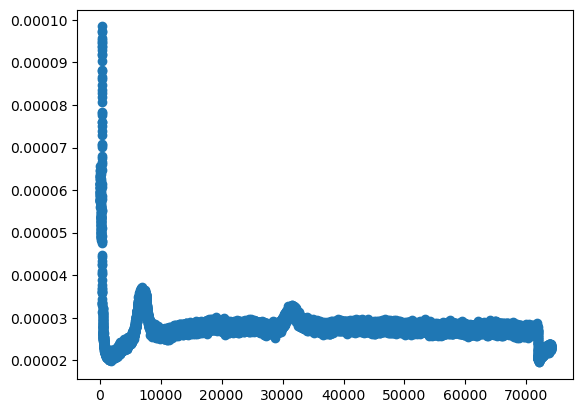

12


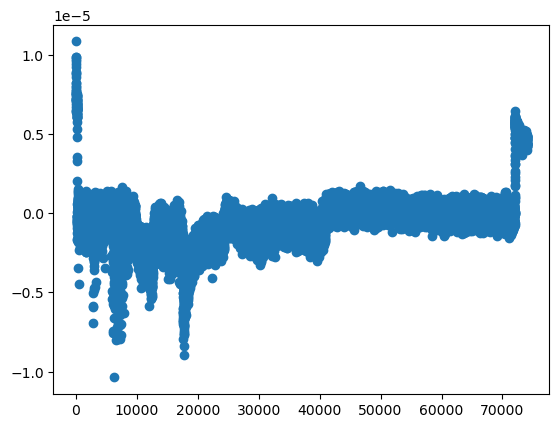

16


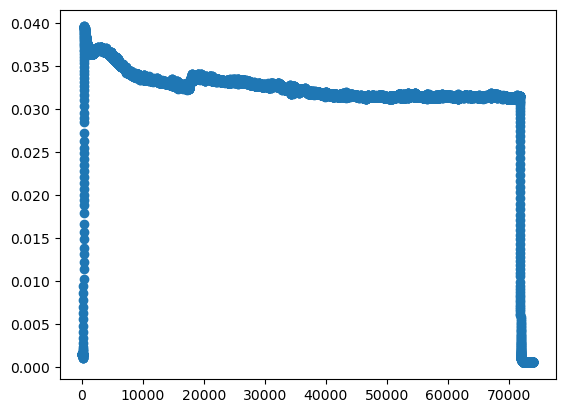

17


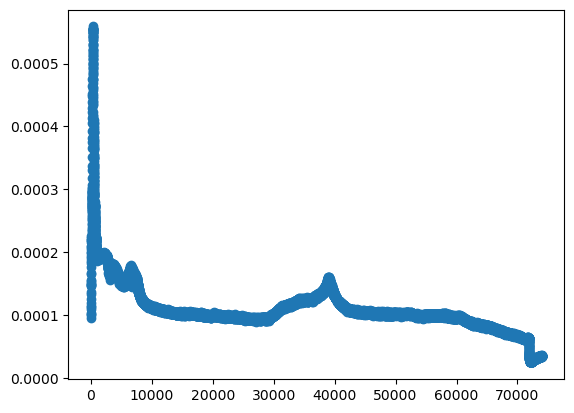

18


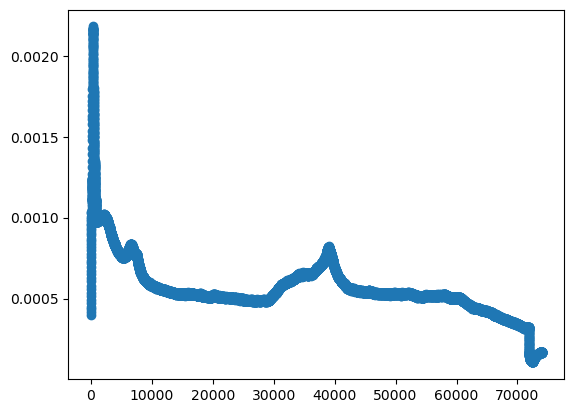

28


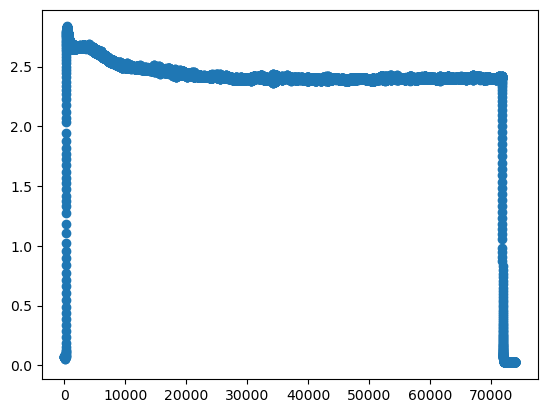

32


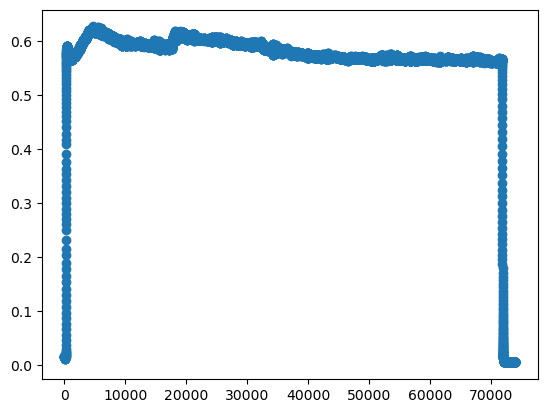

36


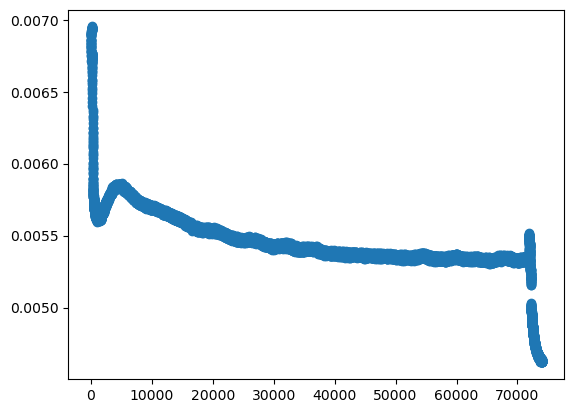

40


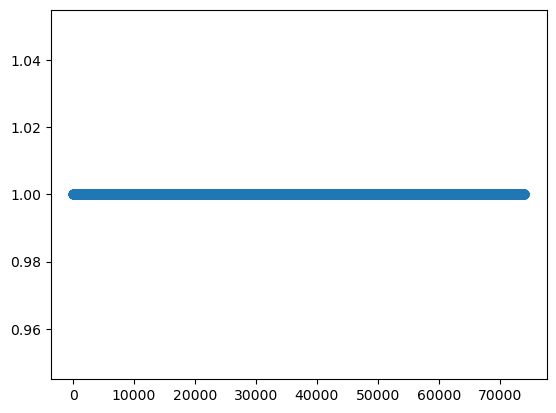

44


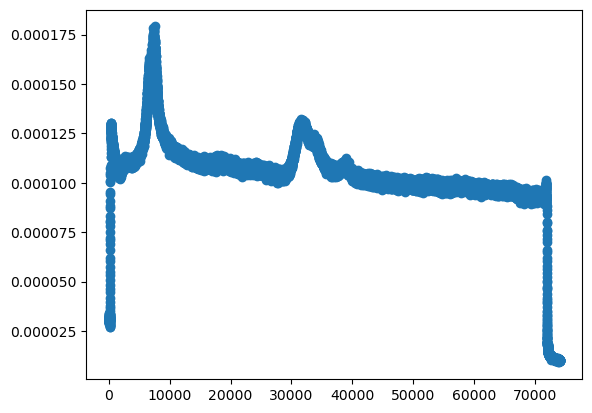

Periph:_Digital_In_0


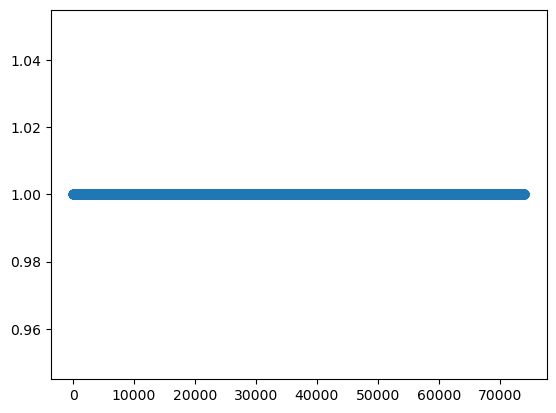

Periph:_Digital_In_1


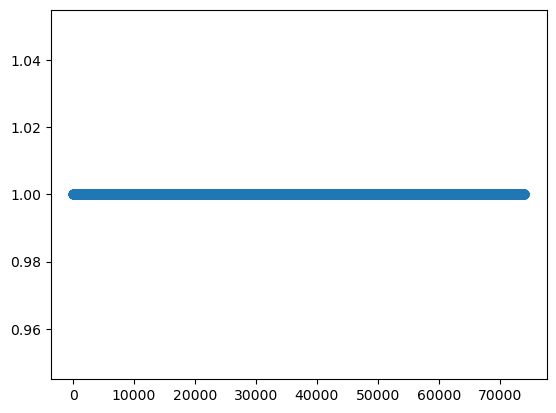

Periph:_Digital_In_2


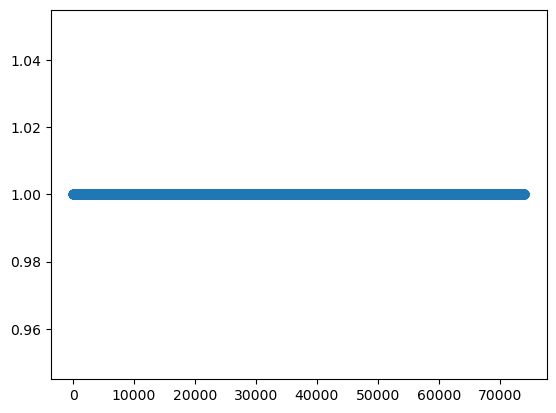

Periph:_Digital_In_3


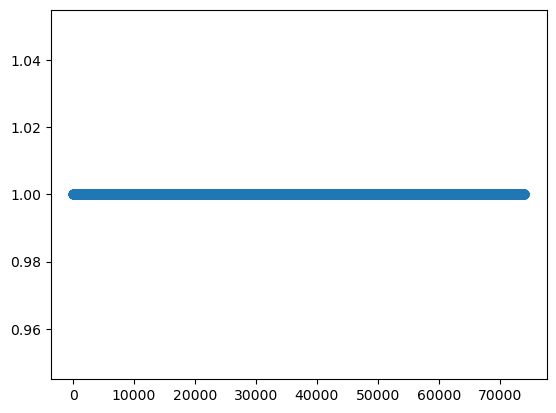

In [ ]:
for col in pdtable:
    print(col)
    if(col!="Time Absolute (Date_Time)"):
        plt.scatter(pdtable['Time Relative (sec)'],pdtable[col])
    # Show/save figure as desired.
    plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()